## Neha Aswal

## <font color = darkblue > Comprehensive Attrition Analysis and Predictive Modeling for HR Management


#### Abstract:
This project analyzes employee attrition patterns in an HR dataset using Python. It categorizes education backgrounds, analyzes age distribution, experience, salary increase, and tenure with Tata to identify key factors influencing attrition. The project implements a decision tree model to predict early attrition (less than 2 years) based on these factors. It provides insights on improving retention through career development, competitive compensation, and a positive work environment. The decision tree model is optimized using grid search and evaluated with precision, recall, and accuracy metrics.

In [38]:
import pandas as pd
df = pd.read_excel(r"C:\Users\91963\OneDrive\Desktop\Attrition of Last Three Years - TISS.xlsx")
df.shape

(67, 16)

In [39]:
df.head()

,Emp No,HQ,State,Age,DOJ,Date of Resignation,Tenure with Tata,Total Experience,Last Rating,SR Target,SR Ach,Last CTC Drawn,Education Background,New Offer,Unnamed: 14,Percent Increase
0,709022,Hisar,1,53,2015-05-01,2016-07-20,1.221918,1,3,150.00,175.000000,440042.875969,M.Sc.(Agri),6.000000e+05,NaN,0.363503
1,711246,Kurukshetra,1,37,2016-07-26,2016-12-02,0.353425,11,2,138.41,166.367434,665692.400000,B.Sc.(Agri),7.800000e+05,NaN,0.171712
2,707658,Sirsa,1,44,2014-05-01,2017-05-03,3.008219,9,5,197.19,581.241054,858931.627962,B.Sc.(Agri),1.065075e+06,NaN,0.240000
3,710692,Panipat,1,57,2016-03-10,2017-02-04,0.906849,3,2,127.41,194.590825,411989.200000,B.Sc.(Agri),5.108666e+05,NaN,0.240000
4,709742,Srinagar,2,57,2015-11-09,2016-06-08,0.580822,8,2,181.43,275.971455,529458.000000,B.Sc.(Agri),7.570000e+05,NaN,0.429764


In [40]:
df.drop(['Unnamed: 14'],axis = 1, inplace = True)

In [41]:
import plotly.express as px
df.shape


(67, 15)

### Exploratory Data Analysis

In [42]:
import matplotlib.pyplot as plt
import numpy as np

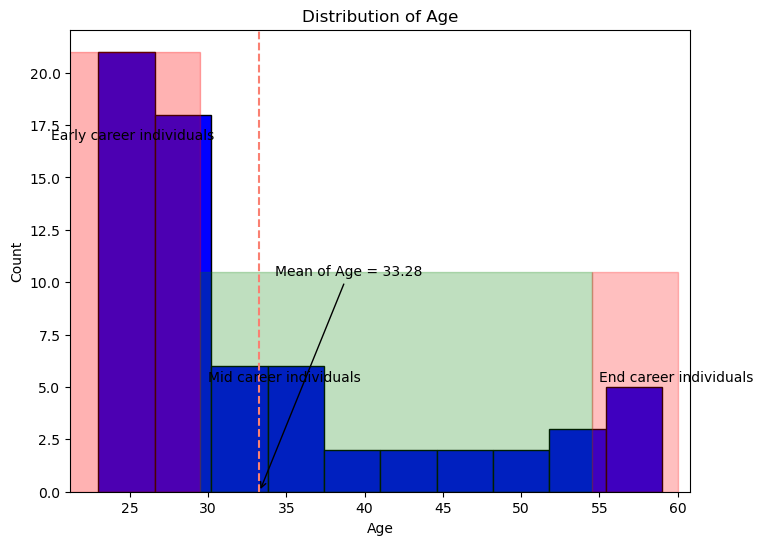

In [46]:
## Understanding the age of employees who left the company

# Create histogram
fig, ax = plt.subplots(figsize=(8,6)) # set the figure size
n, bins, patches = ax.hist(df['Age'], bins=10, color='b', edgecolor='black')

# Add mean line
mean_age = df['Age'].mean()
ax.axvline(x=mean_age, linestyle='--', color='salmon')
ax.annotate(f"Mean of Age = {mean_age:.2f}", xy=(mean_age, 0), xytext=(mean_age+1, max(n)/2),
            arrowprops=dict(arrowstyle='->'), ha='left', va='center')

# Add rectangles
mid_career_rect = plt.Rectangle((19.5, 0), 10, max(n), color='red', alpha=0.3)
ax.add_patch(mid_career_rect)
ax.text(20, max(n)*0.8, "Early career individuals", fontsize=10)

mid_career_rect2 = plt.Rectangle((29.5, 0), 25, max(n)*0.5, color='green', alpha=0.25)
ax.add_patch(mid_career_rect2)
ax.text(30, max(n)*0.25, "Mid career individuals", fontsize=10)

end_career_rect = plt.Rectangle((54.5, 0), 5.5, max(n)*0.5, color='red', alpha=0.25)
ax.add_patch(end_career_rect)
ax.text(55, max(n)*0.25, "End career individuals", fontsize=10)

# Add annotation
ax.annotate("Highest\nAttrition", xy=(27, 25), xytext=(27, max(n)*0.9),
            arrowprops=dict(arrowstyle='->', color="#636363"), ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))
            
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Distribution of Age")
plt.show()

#### Obervation : 
#### Based on the given information, we can draw the following insights from the attrition data:

#### Age range: The you|ngest employee who left the company was 23 years old, while the oldest was 59 years old.

#### Age distribution: The histogram indicates that the majority of employees who left the company were in their late 20s to mid-30s, with the highest frequency between 29 and 36.75 years old.

#### Outliers: There are outliers in the data, as the upper fence (49) is significantly higher than the Q3 value (36.75). This suggests that there were some employees who left the company at an older age, which could be due to retirement or other reasons.

#### Skewness: The data appears to be right-skewed, as the median (Q2 = 29) is lower than the mean age. This suggests that there were some employees who left the company at a relatively older age, which caused the mean age to be higher than the median.

#### Overall, the age distribution of employees who left the company suggests that the organization may have had challenges retaining mid-career employees in their late 20s to mid-30s.

In [45]:
## obtaining a dummy variable for individuals below 30 years of age

def get_categories(x):

    if x<30:
        return 1
    else:
        return 0
    
df['is_age<30'] = df['Age'].apply(get_categories)



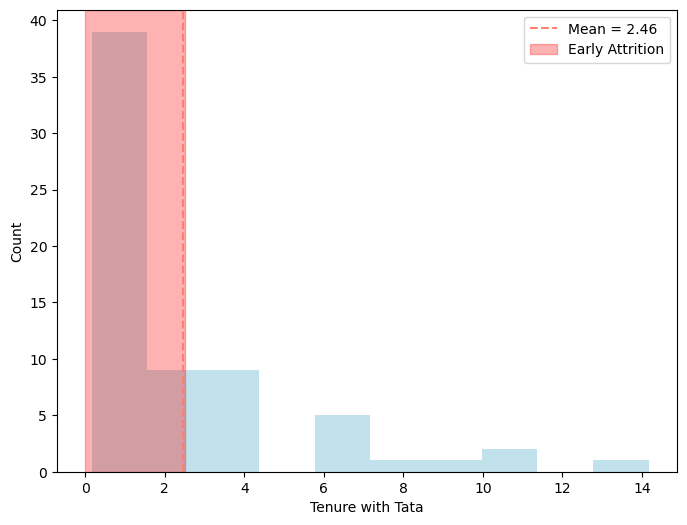

In [10]:
# Plot histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(df['Tenure with Tata'], bins=10, color='lightblue', alpha=0.75)

# Add vertical line for mean
mean = df['Tenure with Tata'].mean()
ax.axvline(mean, linestyle='--', color='salmon', label=f"Mean = {mean:.2f}")

# Add early attrition rectangle
ax.axvspan(0, 2.5, alpha=0.3, color='red', label='Early Attrition')

# Add highest attrition annotation
ax.annotate('Highest\nAttrition', xy=(1, 43), xytext=(-20, -30), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='#636363', lw=2), 
            font=dict(size=12, family="Courier New, monospace"))

# Add labels and legend
ax.set_xlabel('Tenure with Tata')
ax.set_ylabel('Count')
ax.legend()

plt.show()

In [11]:
def get_tenure_category(x):

    if x < 2.5 :
        return 1
    else :
        return 0
    
df['is_tenure<4'] = df['Tenure with Tata'].apply(get_tenure_category)

In [12]:
from statsmodels.stats.proportion import proportions_ztest
count = df['is_tenure<4'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
if pval < 0.05:
    print(f"The proportion of individuals with tenure less than 2.5 years is significantly higher than 0.5 (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals tenure less than 2.5 years is not significantly higher than 0.5 (p-value={pval:.4f})")

The proportion of individuals with tenure less than 2.5 years is significantly higher than 0.5 (p-value=0.0010)


#### Observations :

#### The minimum value (0.16 years) and the lower fence (also 0.16 years) indicate that there are some individuals who have a very short tenure with the company, which is less than the first quartile (Q1).

#### The first quartile (Q1) is 0.61 years, which means that 25% of the individuals in the dataset have a tenure less than 0.61 years.

#### The median (1.032 years) is greater than Q1 and less than Q3, which suggests that the distribution of tenure is roughly symmetric.

#### The third quartile (Q3) is 3.23 years, which means that 75% of the individuals in the dataset have a tenure less than 3.23 years.

#### The upper fence (7 years) is much lower than the maximum value (14.1 years), indicating the presence of outliers with very high tenure.

#### There are several outliers in the dataset, which are represented by the dots beyond the upper fence. These outliers suggest that there are a few individuals who have a very long tenure with the company, which is much higher than the rest of the individuals in the dataset.

#### In summary, the tenure with the company in the attrition dataset is positively skewed with a few outliers having very high tenure. The majority of the individuals have a tenure less than 3.23 years, and 25% of the individuals have a tenure less than 0.61 years.

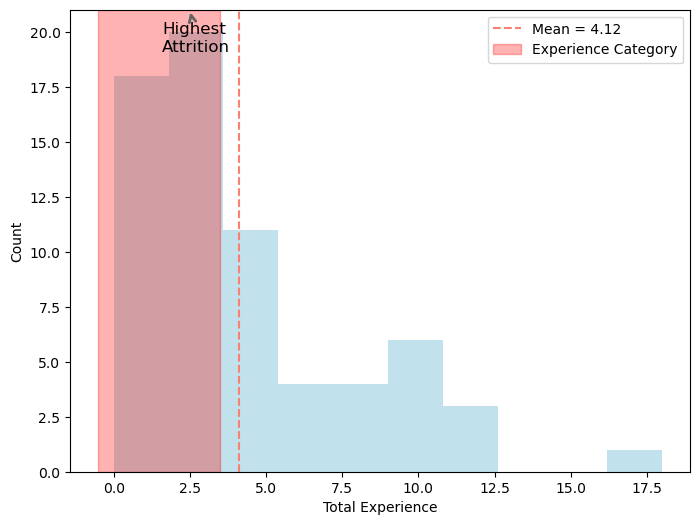

In [13]:
# Plot histogram
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(df['Total Experience'], bins=10, color='lightblue', alpha=0.75)

# Add vertical line for mean
mean = df['Total Experience'].mean()
ax.axvline(mean, linestyle='--', color='salmon', label=f"Mean = {mean:.2f}")

# Add experience category rectangle
ax.axvspan(-0.5, 3.5, alpha=0.3, color='red', label='Experience Category')

# Add highest attrition annotation
ax.annotate('Highest\nAttrition', xy=(2.5, 21), xytext=(-20, -30), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='#636363', lw=2), 
            font=dict(size=12))

# Add labels and legend
ax.set_xlabel('Total Experience')
ax.set_ylabel('Count')
ax.legend()

plt.show()

In [14]:
def get_exp_category(x):

    if x < 3 :
        return 1
    else :
        return 0
    
df['is_exp<3'] = df['Total Experience'].apply(get_tenure_category)

In [15]:
from statsmodels.stats.proportion import proportions_ztest
count = df['is_exp<3'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
if pval < 0.05:
    print(f"The proportion of individuals with total experience less than 3 years is significantly higher (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals with total experience less than 3 years is not significantly higher (p-value={pval:.4f})")

The proportion of individuals with total experience less than 3 years is significantly higher (p-value=0.0318)


#### The range of total experience is from 0 to 18 years, with a minimum value of 0 and a maximum value of 18.
#### The majority of individuals (50%) have a total experience of 3 years or less, which is the median value.
#### The first quartile (Q1) is 1 year, which means that 25% of individuals have a total experience of 1 year or less.
#### The third quartile (Q3) is 6.75 years, which means that 75% of individuals have a total experience of 6.75 years or less.
#### The interquartile range (IQR), which is the distance between Q1 and Q3, is 5.75 years. This indicates that the middle 50% of individuals have a total experience between 1 year and 6.75 years.
#### There are a few outliers on the upper end with a maximum value of 18 years. These outliers suggest that there are a few individuals with a very high total experience before joining the company, which may have implications for recruitment or retention strategies.
#### Overall, it suggests that the majority of individuals joining the company have a relatively low level of total experience, with 50% having 3 years or less. This may indicate that the company is hiring relatively inexperienced individuals and investing in their development, or that there is a high level of attrition among more experienced employees. The outliers on the upper end may also suggest that the company is able to attract highly experienced individuals, but that these individuals are relatively rare.

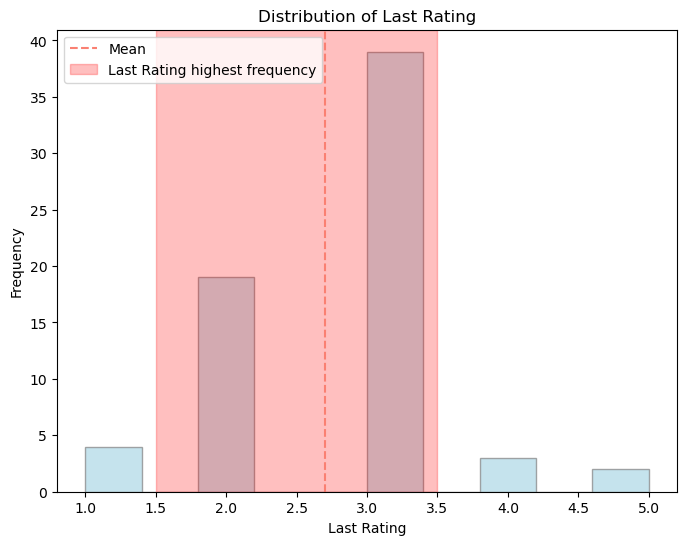

In [16]:
# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['Last Rating'], bins=10, alpha=0.7, edgecolor='grey', color='lightblue')
ax.set_title('Distribution of Last Rating')
ax.set_xlabel('Last Rating')
ax.set_ylabel('Frequency')

# add mean line
ax.axvline(df['Last Rating'].mean(), color='salmon', linestyle='--', label='Mean')

# add annotation for highest attrition
ax.annotate('Highest Attrition', xy=(3, 41), xytext=(-20, -30), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='grey'), fontsize=12)

# add rectangle for highest frequency
ax.axvspan(1.5, 3.5, alpha=0.25, color='red', label='Last Rating highest frequency')
ax.legend()
plt.show()

## Observations on last rating:
#### We can see that the majority of ex-employees had a rating of either 2 or 3, with a smaller number having a rating of 1 or 4, and very few having a rating of 5. It's worth noting that the dataset is likely skewed towards lower ratings, as the median is closer to the lower end of the scale than the upper end. This could be an indication of dissatisfaction or issues with the company culture, management, or work environment, which could be driving employee attrition. However, it's important to analyze other factors as well, such as job satisfaction, compensation, and career development opportunities, to get a more complete understanding of why employees are leaving.

In [17]:
def get_rating_category(x):
    if x == 2 or x ==3:
        return 1
    else:
        return 0
    
df['is_rating_2_3'] =  df['Last Rating'].apply(get_rating_category)

In [18]:
from statsmodels.stats.proportion import proportions_ztest
count = df['is_rating_2_3'].value_counts()[1]
n_obs = df.shape[0]
value = 0.5  # null hypothesis proportion
stat, pval = proportions_ztest(count, n_obs, value)
# print the test result
if pval < 0.05:
    print(f"The proportion of individuals with last rating 2 or 3 is significantly higher (p-value={pval:.4f})")
else:
    print(f"The proportion of individuals with last rating 2 or 3 is not significantly higher (p-value={pval:.4f})")

The proportion of individuals with last rating 2 or 3 is significantly higher (p-value=0.0000)


### Understanding Education Background

In [19]:
## Cleaning the education background column by dividing it to broader categories of PH.D M.Sc MBA and BA/B.Sc

def get_edu_categories(edu):

    if edu.__contains__('PH.D'):
        return 'PH.D'
    elif edu.__contains__('M.Sc'):
        return 'M.Sc'
    elif edu.__contains__('MBA') or edu.__contains__('PGDABPM'):
        return 'MBA/PGDABPM'
    else : 
        return "BA/BSc"
    
df['Edu_category']= df['Education Background'].apply(get_edu_categories)

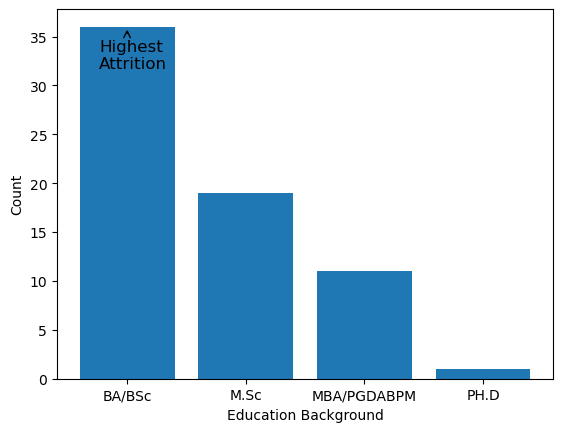

In [20]:

edu_count = df['Edu_category'].value_counts()

fig, ax = plt.subplots()
ax.bar(edu_count.index, edu_count.values)
ax.set_xlabel('Education Background')
ax.set_ylabel('Count')
ax.annotate('Highest\nAttrition', xy=('BA/BSc', 36), xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            fontsize=12, color='black')
plt.show()

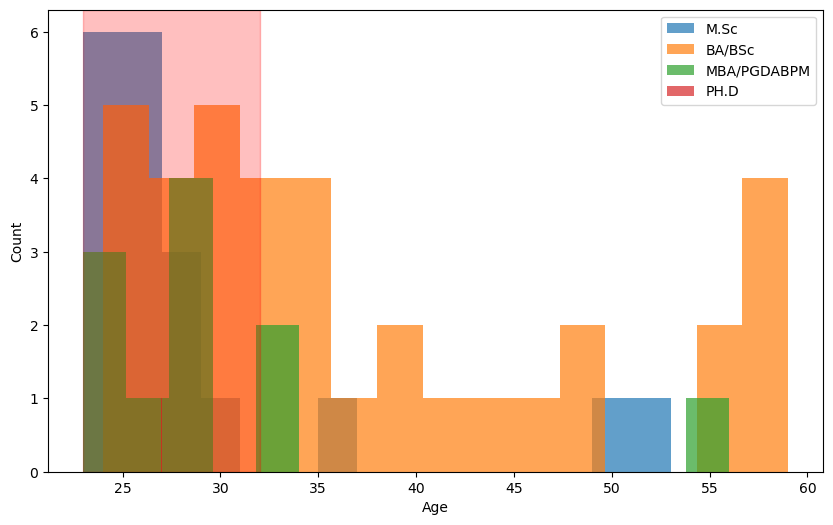

In [21]:
edu_categories = df["Edu_category"].unique()

fig, axs = plt.subplots(figsize=(10,6))
for i, category in enumerate(edu_categories):
    data = df[df["Edu_category"]==category]
    axs.hist(data["Age"], bins=15, alpha=0.7, label=category)
axs.set_xlabel("Age")
axs.set_ylabel("Count")
axs.legend()
axs.axvspan(23, 32, alpha=0.25, color='red',label='Highest Attrition')
plt.show()

#### Based on the given data, we can make the following observations and insights:
The age distribution of M.Sc students is more spread out compared to BA/B.Sc and MBA students. This is evident from the larger range of ages for M.Sc students (23 to 53 years) compared to BA/B.Sc students (24 to 59 years) and MBA students (23 to 56 years).
MBA students have the youngest median age (28 years) compared to M.Sc (33.5 years) and BA/B.Sc (33.5 years) students, indicating that MBA programs may attract younger students or that MBA programs tend to have shorter study durations.

The age distribution of BA/B.Sc students is the most concentrated, with a relatively small range of ages (24 to 59 years) and a small interquartile range (Q1 = 28.5 years, Q3 = 44.5 years).

Only one student in the dataset has a Ph.D, and their age is 27 years. This suggests that Ph.D programs may have more stringent age requirements or may attract students who have completed their undergraduate and graduate studies at a younger age.

All four educational categories have outliers beyond their respective upper fences, indicating the presence of a few older students in each category. These outliers may represent non-traditional students who have returned to school after taking a break or changing careers.

In [22]:
## Dummy cell

#### There are outliers in the age distribution for the M.Sc and MBA categories. These outliers may represent employees who are significantly older than their peers in the same educational category. One possible explanation for these outliers is that the company may not have clear career advancement opportunities for employees with these educational backgrounds, leading them to stay in the same role for a long time.

#### To improve on the attrition for such a data, the company can consider implementing the following strategies:

#### Conduct an exit interview: The company could conduct an exit interview to understand the reasons why employees are leaving. This can help identify any issues or concerns that need to be addressed.

#### Offer career development opportunities: Employees in this age range are often seeking opportunities for growth and development. The company could offer training programs or opportunities for employees to develop new skills, which can help them feel valued and invested in their future with the company.

In [23]:
# Dummy Cell

#### Create a positive work environment: The work environment can have a significant impact on employee retention. The company could create a positive work environment by promoting work-life balance, recognizing and rewarding employees' contributions, and fostering a culture of collaboration and teamwork.

#### Provide competitive compensation and benefits: Employees in this age range may be looking for higher salaries and better benefits. The company could conduct a salary and benefits review to ensure that their compensation package is competitive with industry standards.

#### Offer flexibility: Employees in this age range may be looking for flexible work arrangements, such as remote work options or flexible schedules. The company could consider offering these options to help employees balance their work and personal lives.

#### By taking these actions, the company can show that it values its employees and is committed to their growth and development, which can help reduce attrition rates among employees in the age range of 25-29.

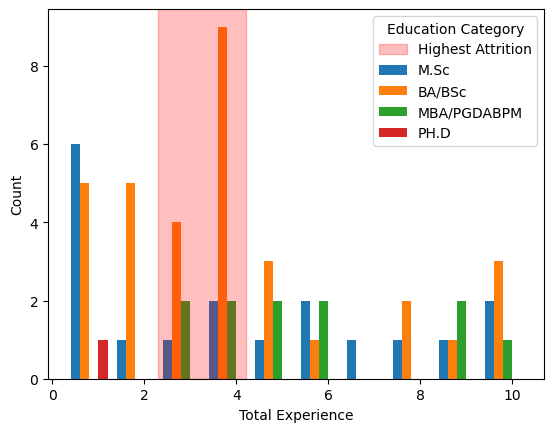

In [24]:
edu_categories = df['Edu_category'].unique()
num_categories = len(edu_categories)
width = 0.8 / num_categories

fig, ax = plt.subplots()

for i, category in enumerate(edu_categories):
    subset_df = df[df['Edu_category'] == category]
    counts, bins = np.histogram(subset_df['Total Experience'], bins=10, range=(0, 10))
    centers = (bins[:-1] + bins[1:]) / 2
    ax.bar(centers + i * width, counts, width=width, label=category)

ax.axvspan(2.3, 4.2, color='red', alpha=0.25, label='Highest Attrition')
ax.annotate('Highest Attrition', xy=(2.5, 25), xytext=(2.5, 35),
            arrowprops=dict(arrowstyle='->', lw=1, color='black'),
            fontsize=12, ha='center', va='center')

ax.set_xlabel('Total Experience')
ax.set_ylabel('Count')
ax.legend(title='Education Category')
plt.show()

#### BA/BSc employess with Total experience between 0 to 4 years are showing high attrition rate
#### There is a reducing trend of attrition with total years of experience
#### MSc employess with 0 years of experience exhibit highest attrition
#### MBA/PGDABPM employess is not seen to exhibit any trend

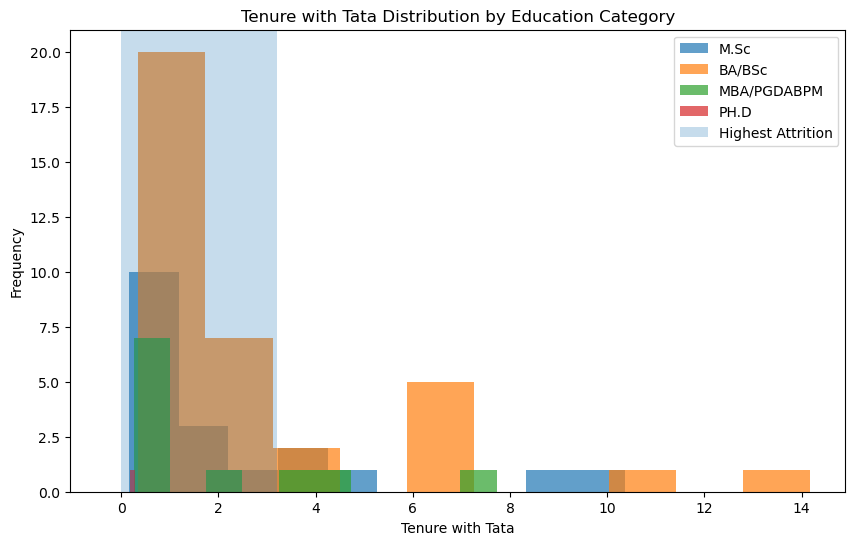

In [25]:
edu_categories = df['Edu_category'].unique()

fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(edu_categories):
    data = df[df['Edu_category'] == category]['Tenure with Tata']
    ax.hist(data, bins=10, alpha=0.7, label=category)

ax.axvspan(0, 3.2, alpha=0.25, label='Highest Attrition')
ax.set_xlabel('Tenure with Tata')
ax.set_ylabel('Frequency')
ax.set_title('Tenure with Tata Distribution by Education Category')
ax.legend()
plt.show()

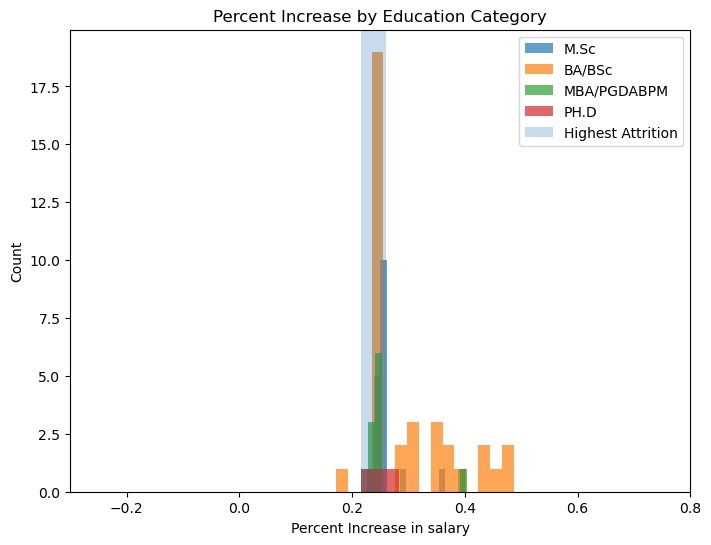

In [26]:
edu_categories = df['Edu_category'].unique()

fig, ax = plt.subplots(figsize=(8, 6))

for i, edu_cat in enumerate(edu_categories):
    subset = df[df['Edu_category'] == edu_cat]
    ax.hist(subset['Percent Increase'], bins=15, alpha=0.7, label=edu_cat)

ax.axvspan(0.215, 0.26, alpha=0.25, label='Highest Attrition')

ax.set_xlabel('Percent Increase in salary')
ax.set_ylabel('Count')
ax.set_title('Percent Increase by Education Category')
ax.legend()

plt.show()

#### If the company is facing high attrition rates and its employees are being offered a salary increase of 22% to 27% in their next company, the company can take the following actions to address this issue:

#### Review the current salary structure:
#### a. Conduct a salary survey: The company can conduct a salary survey to determine the market rates for various job roles in the industry and region it operates. This will help the company identify any gaps in its current salary structure.

#### b. Benchmark salaries: The company can benchmark its salaries against the industry standards to ensure that they are competitive. It can also compare salaries with its competitors to see where it stands.

#### c. Consider cost of living and inflation rates: The company should consider the cost of living and inflation rates in the region where it operates. This will help it determine the appropriate salary increase needed to keep up with the rising cost of living.

#### Offer competitive benefits: Besides salary, the company should also offer competitive benefits such as health insurance, retirement plans, paid time off, and other perks that will help retain employees.

#### Create a positive work environment: The company should create a positive work environment that values its employees and fosters a culture of inclusivity, diversity, and open communication. This will help build a strong relationship between the company and its employees.

In [27]:
## analyzing percentage percentage of target achieved

df['target_percent'] = (df['SR Ach']/df['SR Target'])*100


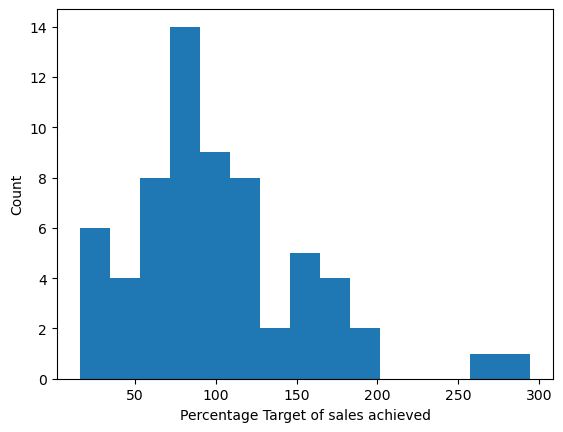

In [28]:
plt.hist(df['target_percent'], bins=15)
plt.xlabel('Percentage Target of sales achieved')
plt.ylabel('Count')
plt.show()

#### There could be several reasons why employees who are achieving around 80-99% of their targets are leaving the organization.

#### Lack of Recognition: Employees who are achieving 80-99% of their targets may feel that their efforts are not being recognized or appreciated enough. This can lead to a lack of motivation and a feeling of being undervalued.

#### Limited Growth Opportunities: Another reason why employees may leave is due to a lack of growth opportunities. If they feel that there is no room for advancement or that their career is stagnating, they may look for opportunities elsewhere.

#### Poor Work-Life Balance: Employees who are achieving high targets may feel that they are overworked and not able to maintain a good work-life balance. This can lead to burnout and a desire to leave the organization.

### IMPLEMENTING DECISION TREE

Creating an output variable "is_EarlyAttrition"(less than 2 years). We want to analyze the factors affecting early attrition

In [29]:
def get_attrition_category(x):
    if x > 2:
        return 0
    else:
        return 1

df['is_EarlyAttrition'] = df['Tenure with Tata'].apply(get_attrition_category)
df['Total Experience TATA_Before TATA'] = df['Tenure with Tata'] + df['Total Experience']

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
df.dropna(inplace =True)


In [31]:
## data pre-processing

one_hot = pd.get_dummies(df['State'],drop_first = True)

df = df.join(one_hot)

In [32]:
#data_pre processing 

def edu_cat(x):
    if x == "PH.D":
        return 4
    elif x == "MBA":
        return 3
    elif x == "M.Sc":
        return 2
    else:
        return 1
    
df['edu_encoded'] = df['Edu_category'].apply(edu_cat)

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_text

param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


# separate input features and target variable
X = df[['edu_encoded',   'Total Experience',          'Last Rating',
                  'SR Target',               'SR Ach',       'Last CTC Drawn',
                  'New Offer',     'Percent Increase',       'target_percent', 'Total Experience TATA_Before TATA']]
y = df['is_EarlyAttrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8, 16]})

In [34]:
best_params = grid_search.best_params_
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
# obtain rules from decision tree
rules = export_text(best_dt, feature_names=list(X.columns))

# print rules
print("Rules to prevent early attrition (less than 2 years)")
print(rules)

Rules to prevent early attrition (less than 2 years)
|--- Total Experience TATA_Before TATA <= 5.87
|   |--- Percent Increase <= 0.38
|   |   |--- class: 1
|   |--- Percent Increase >  0.38
|   |   |--- SR Target <= 122.55
|   |   |   |--- class: 1
|   |   |--- SR Target >  122.55
|   |   |   |--- class: 0
|--- Total Experience TATA_Before TATA >  5.87
|   |--- Total Experience <= 6.50
|   |   |--- class: 0
|   |--- Total Experience >  6.50
|   |   |--- Total Experience TATA_Before TATA <= 11.67
|   |   |   |--- class: 1
|   |   |--- Total Experience TATA_Before TATA >  11.67
|   |   |   |--- class: 0



#### Focus on employees with lower Total Experience Before TATA plus in TATA: The decision tree suggests that employees with Total Experience Before TATA plus in TATA less than or equal to 5.87 are more likely to have early attrition. The company can focus on providing better training and support for employees in this group, such as mentorship, job shadowing, and opportunities for career advancement.

#### Provide opportunities for growth: The decision tree suggests that employees with higher Total Experience TATA + Before TATA are more likely to stay, but only if they have opportunities for growth. The company can provide training and development programs, as well as opportunities for promotion and advancement, to encourage employees to stay long-term.

#### Offer competitive compensation: The decision tree suggests that employees who received a new offer greater than 651013.50 and have experienced a high percent increase in compensation are more likely to stay in the company. The company can offer competitive salaries, bonuses, and benefits to retain employees and incentivize them to stay.

#### Prioritize education: The decision tree suggests that employees with higher levels of education are less likely to have early attrition. The company can prioritize education and training for employees, including tuition reimbursement programs, to encourage employees to continue their education and improve their skills.

In [36]:
y_pred = best_dt.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



#### Precision: It measures the proportion of correctly predicted positive instances out of all positive predictions. For class 0, the precision is 0.80, indicating that out of four instances predicted as class 0, three were actually class 0, and one was a false positive (predicted as 0 but actually 1). For class 1, the precision is 1.00, indicating that out of nine instances predicted as class 1, all were actually class 1.

#### Recall: It measures the proportion of correctly predicted positive instances out of all actual positive instances. For class 0, the recall is 1.00, indicating that out of four instances that were actually class 0, all were correctly predicted as class 0. For class 1, the recall is 0.89, indicating that out of nine instances that were actually class 1, eight were correctly predicted as class 1, and one was a false negative (predicted as 0 but actually 1).

#### F1-score: It is the harmonic mean of precision and recall, which gives equal weight to both metrics. For class 0, the F1-score is 0.89, which is the harmonic mean of precision (0.80) and recall (1.00). For class 1, the F1-score is 0.94, which is the harmonic mean of precision (1.00) and recall (0.89).

#### Support: It is the number of instances in each class in the test set. For class 0, the support is 4, and for class 1, the support is 9.

#### Accuracy: It measures the proportion of correctly predicted instances out of all instances. The overall accuracy of the model is 0.92, which means that 12 instances out of 13 were correctly predicted.

#### Macro-average F1-score: It is the average of F1-scores of both classes, weighted equally. The macro-average F1-score is 0.92, which is the average of 0.89 and 0.94.

#### Weighted-average F1-score: It is the average of F1-scores of both classes, weighted by their support. The weighted-average F1-score is 0.93, which is the weighted average of 0.89 and 0.94, with weights 4/13 and 9/13, respectively.

## THANK YOU!